# Nanocylinder AFM tip damping measurements during localized photopolymerization
### Thiol-ene resin in a thin (5 $\mu$m) film exposed to 405 nm light

## 0. Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from scipy.optimize import curve_fit
from scipy import interpolate

## 1. Read data

In [2]:
# x2 = pd.read_csv('./191125/x2.txt', sep=' ') # 5V, 5 pix
x3 = pd.read_csv('./191125/x3.txt', sep=' ') # 5V, 2 pix
x4 = pd.read_csv('./191125/x4.txt', sep=' ') # 5V, 10 pix
x5 = pd.read_csv('./191125/x5.txt', sep=' ') # 2.5V, 5 pix
x6 = pd.read_csv('./191125/x6.txt', sep=' ') # 1.25V, 5 pix
x7 = pd.read_csv('./191125/x7.txt', sep=' ') # 5V, 5 pix
x8 = pd.read_csv('./191125/x8.txt', sep=' ') # 5V, 2 pix
x10 = pd.read_csv('./191125/x10.txt', sep=' ') # 5V, 10 pix
# Rename columns
for x in [x3,x4,x5,x6,x7,x8,x10]:
    x.columns = (['Time','Amp','Amp2','Phase','Phase2','Freq','Bias','Q','Freq0'])

## 2. Calculate the change in Q during each light exposure

In [3]:
# Initialize arrays/lists for delta(Q) 
dQ = np.zeros([26,7])
AllData = [0]*7
AllSts = [0]*7
AllEnds = [0]*7

NumExp = 26 # number of light exposures
position = np.array(list(range(-11,14)))*4*.75 # Converting position from pixels to um

for i,x in enumerate([x3,x4,x5,x6,x7,x8,x10]):
    exper = x
    exper.Time = x.Time - x.Time.iloc[0]
    AllData[i] = exper


    #Calculate rolling average Q values
    exper['Q_sm'] = exper.Q.rolling(20, center=True).mean()

    # Use changes in Bias signal to find light on/off timepoints
    exper['BiasGrad'] = np.gradient(exper.Bias)
    Edges = exper[np.gradient(exper.Bias)!=0]
    Sts = Edges[Edges.Bias>0]
    Sts = Sts[Sts.BiasGrad>0]
    Ends = Edges[Edges.Bias>0]
    Ends = Ends[Ends.BiasGrad<0]
    
    # Initialize arrays and store Q values at beginning and end of each light exposure
    Qinit = np.zeros(NumExp)
    Qfin = np.zeros(NumExp)
    for y in range(NumExp):
        Qinit[y] = Sts.Q_sm.iloc[y]
        Qfin[y] = Ends.Q_sm.iloc[y]
    
    # Store light on/off locations
    AllSts[i] = Sts
    AllEnds[i] = Ends
    
    # Calculate the change in Q during each light exposure
    dQ[:,i] = Qfin/Qinit


## 3. Plot damping ratio increase during light exposure and recovery after

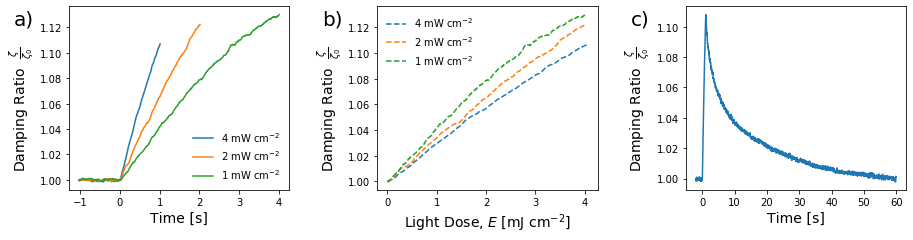

In [4]:
fig, ((ax1,ax2,ax3)) = plt.subplots(1,3, figsize = (15, 3.5))
ax1.plot((AllData[4].iloc[AllSts[4].index[12]-200:AllEnds[4].index[12]].Time-AllData[4].iloc[AllSts[4].index[12]].Time), 1/(AllData[4].iloc[AllSts[4].index[12]-200:AllEnds[4].index[12]].Q_sm/AllData[4].iloc[AllSts[4].index[12]].Q_sm),label = '4 mW cm$^{-2}$')
ax1.plot((AllData[2].iloc[AllSts[2].index[12]-200:AllEnds[2].index[12]].Time-AllData[2].iloc[AllSts[2].index[12]].Time), 1/(AllData[2].iloc[AllSts[2].index[12]-200:AllEnds[2].index[12]].Q_sm/AllData[2].iloc[AllSts[2].index[12]].Q_sm),label = '2 mW cm$^{-2}$')
ax1.plot((AllData[3].iloc[AllSts[3].index[12]-200:AllEnds[3].index[12]].Time-AllData[3].iloc[AllSts[3].index[12]].Time), 1/(AllData[3].iloc[AllSts[3].index[12]-200:AllEnds[3].index[12]].Q_sm/AllData[3].iloc[AllSts[3].index[12]].Q_sm),label = '1 mW cm$^{-2}$')
ax1.legend(frameon=False)
ax1.set_ylabel(r'Damping Ratio  $\frac{\zeta}{\zeta_0}$     ',fontsize = 14,rotation =90)
ax1.set_xlabel('Time [s]',fontsize = 14)
ax1.text(-.25,.9, 'a)', transform=ax1.transAxes, size=20)

ax2.plot((AllData[4].iloc[AllSts[4].index[12]:AllEnds[4].index[12]].Time-AllData[4].iloc[AllSts[4].index[12]].Time)*4, 1/(AllData[4].iloc[AllSts[4].index[12]:AllEnds[4].index[12]].Q_sm/AllData[4].iloc[AllSts[4].index[12]].Q_sm),'--',label = '4 mW cm$^{-2}$')
ax2.plot((AllData[2].iloc[AllSts[2].index[12]:AllEnds[2].index[12]].Time-AllData[2].iloc[AllSts[2].index[12]].Time)*2, 1/(AllData[2].iloc[AllSts[2].index[12]:AllEnds[2].index[12]].Q_sm/AllData[2].iloc[AllSts[2].index[12]].Q_sm),'--',label = '2 mW cm$^{-2}$')
ax2.plot((AllData[3].iloc[AllSts[3].index[12]:AllEnds[3].index[12]].Time-AllData[3].iloc[AllSts[3].index[12]].Time), 1/(AllData[3].iloc[AllSts[3].index[12]:AllEnds[3].index[12]].Q_sm/AllData[3].iloc[AllSts[3].index[12]].Q_sm),'--',label = '1 mW cm$^{-2}$')
ax2.legend(frameon=False)
ax2.set_ylabel(r'Damping Ratio  $\frac{\zeta}{\zeta_0}$     ',fontsize = 14,rotation =90)
ax2.set_xlabel('Light Dose, $E$ [mJ cm$^{-2}$]',fontsize = 14)
ax2.text(-.25,.9, 'b)', transform=ax2.transAxes, size=20)

ax3.plot((AllData[4].iloc[AllSts[4].index[12]-400:AllEnds[4].index[12]+11500].Time-AllData[4].iloc[AllSts[4].index[12]].Time), 1/(AllData[4].iloc[AllSts[4].index[12]-400:AllEnds[4].index[12]+11500].Q_sm/AllData[4].iloc[AllSts[4].index[12]].Q_sm),label = '5 V')
ax3.set_xlabel('Time [s]',fontsize = 14)
ax3.set_ylabel(r'Damping Ratio  $\frac{\zeta}{\zeta_0}$     ',fontsize = 14,rotation =90)
ax3.text(-.25,.9, 'c)', transform=ax3.transAxes, size=20)
plt.subplots_adjust( wspace = 0.4)
plt.gcf().subplots_adjust(bottom=0.15)
fig.savefig('./figures/beta_T_Dose_recovery.svg')
fig.savefig('./figures/beta_T_Dose_recovery.png',dpi=300)

## 4. Spatial effect on damping

Text(0, 0.5, 'Damping Ratio  $\\frac{\\zeta}{\\zeta_0}$     ')

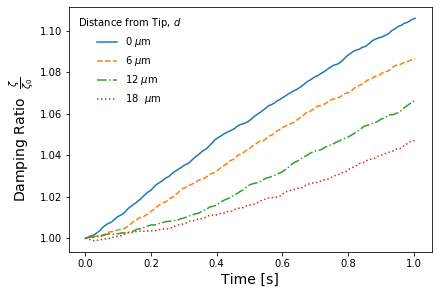

In [16]:
run=4
EndN=197
fig, ax = plt.subplots(figsize = (6.5,4.5))
lines = ['-','--','-.',':']
for i, d in enumerate([12,10,8,6]):
    ax.plot(AllData[run].Time.iloc[0:EndN], 1/(AllData[run].Q_sm.iloc[Sts.index[d]:Sts.index[d]+EndN]/AllData[run].Q_sm.iloc[Sts.index[d]]),linestyle=lines[i])
ax.legend(['0 $\mu$m','6 $\mu$m','12 $\mu$m','18  $\mu$m'], title='Distance from Tip, $d$',frameon=False)
ax.set_xlabel('Time [s]',fontsize = 14)
ax.set_ylabel(r'Damping Ratio  $\frac{\zeta}{\zeta_0}$     ',fontsize = 14,rotation =90)


## 5. Fit rheo-Raman data to model

model: $\eta = \eta_0\left(1-\frac{p}{p_{crit}}\right)^{-\alpha}$



[ 0.78862649 -1.20486057] [0.02172639 0.0921654 ]


(0.9, 15)

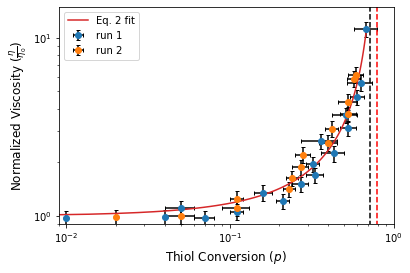

In [6]:
run1 = pd.read_csv('./thiol_ene1.txt',sep='\t')
run2 = pd.read_csv('./thiol_ene2.txt',sep='\t')
run1['normvisc'] = run1.Visc/run1.Visc[0]
run2['normvisc'] = run2.Visc/run2.Visc[0]
combined = pd.concat([run1,run2],ignore_index=True)


r = 0.64
pgel = 1/(r*3)**0.5
pgel

def Model2(p,pcrit,exp):
    return((1-p/pcrit)**(exp))

popt,pcov = curve_fit(Model2,combined.ExtOfRxn[combined.ExtOfRxn>0],combined.normvisc[combined.ExtOfRxn>0])
pcrit = popt[0]
k = popt[1]
perr = np.sqrt(np.diag(pcov))
print(popt, perr)

fig, ax = plt.subplots()
ax.errorbar(run1.ExtOfRxn,run1.normvisc,xerr=run1.EoR_std_err,yerr=run1.normvisc/10,fmt='C0o',ecolor='k',capsize=2,label='run 1')
ax.errorbar(run2.ExtOfRxn,run2.normvisc,xerr=run2.EoR_std_err,yerr=run2.normvisc/10,fmt='C1o',ecolor='k',capsize=2,label='run 2')
ax.plot(np.linspace(0,max(combined.ExtOfRxn),100),Model2(np.linspace(0,max(combined.ExtOfRxn),100),*popt),'C3',label='Eq. 2 fit')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()
ax.plot([.722,.722],[.1,100],'k--')
plt.plot([.788,.788],[.1,100],'r--')

ax.set_xlabel('Thiol Conversion ($\it{p}$)',fontsize=12)
ax.set_ylabel(r'Normalized Viscosity ($\frac{\eta}{\eta_0}$)',fontsize=12)
ax.set_xlim(9e-3,1)
ax.set_ylim(0.9,15)

## 6. Apply model to viscosity data and plot spatial evolution

0 411
1 251
2 146
3 all p below 0.04
4 146
5 93


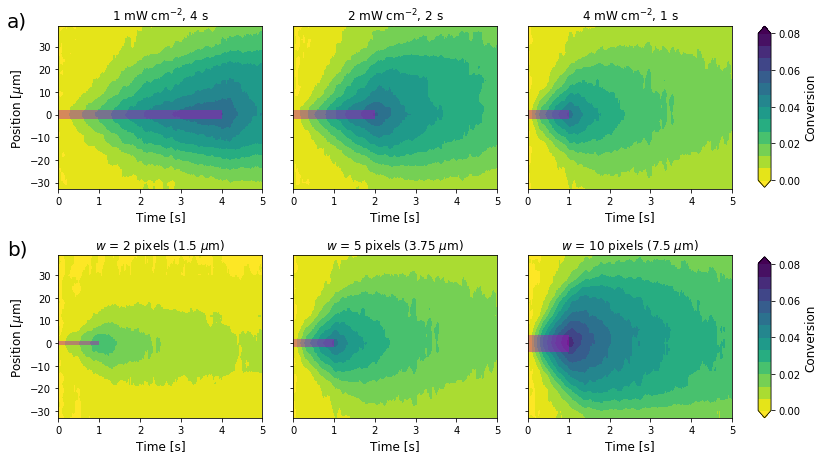

In [7]:
fig, axs = plt.subplots(2,3, figsize = (12, 8), sharey='row')
EndN = 196*8 #number of points after exposure start to include
titles = ['1 mW cm$^{-2}$, 4 s','2 mW cm$^{-2}$, 2 s','4 mW cm$^{-2}$, 1 s','$w$ = 2 pixels (1.5 $\mu$m)','$w$ = 5 pixels (3.75 $\mu$m)','$w$ = 10 pixels (7.5 $\mu$m)']
allconv = list(range(6))
for i,n in enumerate([3,2,4,5,4,1]):
    Q = np.empty(0)
    exp = AllData[n]
    
    # Get normalized Q values during exposure
    for x in range(NumExp):
        Q = np.append(Q,exp.Q_sm.iloc[Sts.index[x]:Sts.index[x]+EndN]/exp.Q_sm.iloc[Sts.index[x]])
    
    
    blank_baseline = Q[:EndN]
    q = Q[EndN:] #remove first (blank) exposure
    q = q.reshape(25,EndN)
    for row in range(25):
        q[row,:] = q[row,:]+(1-blank_baseline)
        
    p = pcrit*(1-(1/q)**(1/k)) # Find conversion value from model 2 fit
    allconv[i] = p
    
    # find index of 4% conversion
    p05 = pd.DataFrame(p[11,:])
    test2 = p05[p05>.04].dropna()
    if(len(test2)):
        print(i, test2.index[0])
    else:
        print(i, 'all p below 0.04')
    
    
    y = np.array(list(range(-11,14)))*4*.75 #convert exposure number to position, each shifted by 4px @ 0.75 um/pixel
    x = exp.Time[0:EndN]
    X,Y = np.meshgrid(x,y)
    col = i%3
    row = int(np.floor(i/3))
    im1 = axs[row,col].contourf(X,Y,p, levels=np.linspace(0,.08,13), extend = 'both',  cmap='viridis_r')
    if col==0:
        axs[row,col].set_ylabel('Position [$\mu$m]', fontsize = 12)
    axs[row,col].set_xlabel('Time [s]', fontsize = 12)
    axs[row,col].set_title(titles[i])
    axs[row,col].set_xlim(0,5)

# Colorbars    
cbaxes = fig.add_axes([.91, 0.6, 0.015, 0.28])  
cb = plt.colorbar(im1, cax = cbaxes, ticks=np.linspace(0,.1,6)) 
cb.set_label('Conversion', fontsize=12)
cb2axes = fig.add_axes([.91, 0.2, 0.015, 0.28])  
cb2 = plt.colorbar(im1, cax = cb2axes, ticks=np.linspace(0,.1,6)) 
cb2.set_label('Conversion', fontsize=12)

# Light exposure overlays
axs[0,0].fill_between([0,4],[1.875,1.875],[-1.875,-1.875],color='m',linewidth=0,alpha=0.4)
axs[0,1].fill_between([0,2],[1.875,1.875],[-1.875,-1.875],color='m',linewidth=0,alpha=0.4)
axs[0,2].fill_between([0,1],[1.875,1.875],[-1.875,-1.875],color='m',linewidth=0,alpha=0.4)
axs[1,0].fill_between([0,1],[.75,.75],[-.75,-.75],color='m',linewidth=0,alpha=0.4)
axs[1,1].fill_between([0,1],[1.875,1.875],[-1.875,-1.875],color='m',linewidth=0,alpha=0.4)
axs[1,2].fill_between([-1,1],[3.75,3.75],[-3.75,-3.75],color='m',linewidth=0,alpha=0.4)

axs[0,0].text(-.25,1, 'a)', transform=axs[0,0].transAxes, size=20)
axs[1,0].text(-.25,1, 'b)', transform=axs[1,0].transAxes, size=20)
plt.subplots_adjust(left = 0.1, right = .88, bottom = 0.2, hspace =0.4, wspace = 0.15)

## 7. Plot spatial conversion at the end of light exposure and calculate FWHM

FWHM =  [27.54354354]
FWHM =  [39.36336336]
FWHM =  [45.68168168]


([<matplotlib.axis.XTick at 0x1bc7182b988>,
 <a list of 4 Text xticklabel objects>)

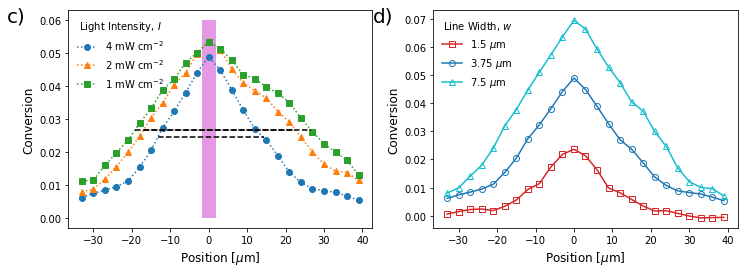

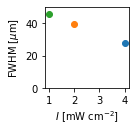

In [15]:
dQcorr = np.zeros(dQ.shape)
for i in range(26):
    dQcorr[i,:] = dQ[i,:]-dQ[0,:]+1

dQcorr_del = np.delete(dQcorr,0,0)
conversion = pcrit*(1-(1/dQcorr_del)**(1/k))

fig, axs = plt.subplots(1,2, figsize = (12,4))
axs[0].plot(position,conversion[:,4],':o',label = '4 mW cm$^{-2}$')
axs[0].plot(position,conversion[:,2],':^',label = '2 mW cm$^{-2}$')
axs[0].plot(position,conversion[:,3],':s',label = '1 mW cm$^{-2}$')
axs[0].legend(frameon=False,title = 'Light Intensity, $I$',loc = 'upper left')
axs[0].set_xlabel('Position [$\mu$m]', fontsize = 12)
axs[0].set_ylabel('Conversion', fontsize = 12)
axs[0].text(-.2,.95, 'c)', transform=axs[0].transAxes, size=20)
axs[0].fill_between([-1.875,1.875],[0,0],[.06,.06],color='m',linewidth=0,alpha=0.4)

Light_Intensity = [4,2,1]
for i,n in enumerate([4,2,3]):
    f = interpolate.interp1d(position, conversion[:,n])

    yLower = np.linspace(-30,0,1000)
    pLowInter = f(yLower)
    error = min(abs(pLowInter-np.max(conversion[:,n])/2))
    location = np.where(abs(pLowInter-np.max(conversion[:,n])/2) == error)
    leftx = yLower[location[0]]
    HM = pLowInter[location[0]]
    
    yUpper = np.linspace(0,36,1000)
    pUpInter = f(yUpper)
    error2 = min(abs(pUpInter-np.max(conversion[:,n])/2))
    location = np.where(abs(pUpInter-np.max(conversion[:,n])/2) == error2)
    rightx = yUpper[location[0]]
    HM = pUpInter[location[0]]
    axs[0].plot([leftx,rightx],[HM,HM],'k--')
    print('FWHM = ', rightx-leftx)

axs[1].plot(position,conversion[:,5],'-s',c='C3',fillstyle='none',label = '1.5 $\mu$m')
axs[1].plot(position,conversion[:,4],'-o',c='C0',fillstyle='none',label = '3.75 $\mu$m')
axs[1].plot(position,conversion[:,1],'-^',c='C9',fillstyle='none',label = '7.5 $\mu$m')
axs[1].legend(frameon=False,title = 'Line Width, $w$', loc = 'upper left')
axs[1].set_xlabel('Position [$\mu$m]', fontsize = 12)
axs[1].set_ylabel('Conversion', fontsize = 12)
axs[1].text(-.2,.95, 'd)', transform=axs[1].transAxes, size=20)

# Full width at half maximum (FWHM) inset
plt.figure(figsize = (1.5,1.5))
plt.plot(4,27.5,'o',2,39.4,'o',1,45.7,'o')

plt.ylim(0,50)
plt.ylabel('FWHM [$\mu$m]')
plt.xlabel('$I$ [mW cm$^{-2}$]')
plt.xticks([1,2,3,4])


## 8. Plot conversion profiles at equal $p_{max}$ = 0.04

FWHM =  [36.36363636]
FWHM =  [30.60606061]
FWHM =  [22.12121212]


([<matplotlib.axis.XTick at 0x1bc6ee96208>,
 <a list of 4 Text xticklabel objects>)

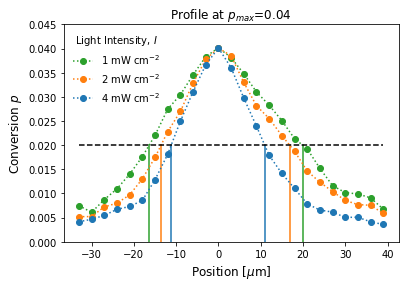

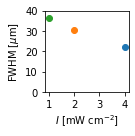

In [8]:
inds = [411,251,146]

colors = ['C2','C1','C0']
for n in [0,1,2]:
    plt.plot(y,allconv[n][:,inds[n]],':o',color=colors[n])        
    f = interpolate.interp1d(y, allconv[n][:,inds[n]])

    yLower = np.linspace(-30,0,100)
    pLowInter = f(yLower)

    HM = min(abs(pLowInter-.02))
    location = np.where(abs(pLowInter-.02) == HM)
    leftx = yLower[location[0]]
    plt.plot([leftx,leftx],[0,.02],color=colors[n],label='_nolegend_')

    yUpper = np.linspace(0,30,100)
    pUpInter = f(yUpper)
    HM2 = min(abs(pUpInter-.02))
    location = np.where(abs(pUpInter-.02) == HM2)
    rightx = yUpper[location[0]]
    plt.plot([rightx,rightx],[0,.02],color=colors[n],label='_nolegend_')
    print('FWHM = ', rightx-leftx)

plt.plot([-33,39],[.02,.02],'k--')
plt.ylim(0,.045)
plt.legend(['1 mW cm$^{-2}$','2 mW cm$^{-2}$','4 mW cm$^{-2}$'], title="Light Intensity, $I$",loc="upper left",frameon=False)
plt.title('Profile at $p_{max}$=0.04', fontsize = 12)
plt.ylabel('Conversion $p$', fontsize = 12)
plt.xlabel('Position [$\mu$m]', fontsize = 12)

# Full width at half maximum (FWHM) inset
plt.figure(figsize = (1.5,1.5))
plt.plot(4,22.1,'o',2,30.6,'o',1,36.4,'o')

plt.ylim(0,40)
plt.ylabel('FWHM [$\mu$m]')
plt.xlabel('$I$ [mW cm$^{-2}$]')
plt.xticks([1,2,3,4])


## 9. Plot repeated experiments

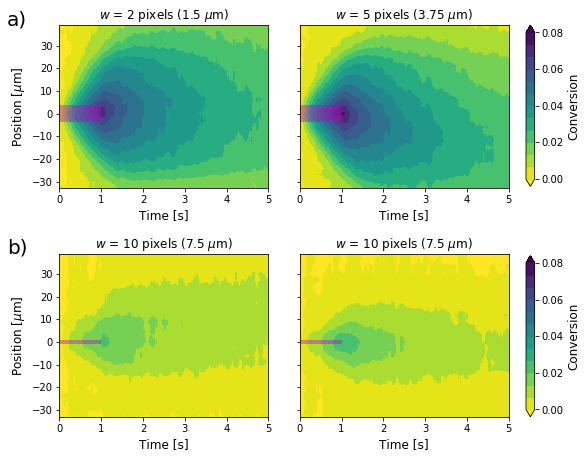

In [9]:
fig, axs = plt.subplots(2,2, figsize = (8, 8), sharey='row')
EndN = 196*8 #number of points after exposure start to include
titles = ['$w$ = 2 pixels (1.5 $\mu$m)','$w$ = 5 pixels (3.75 $\mu$m)','$w$ = 10 pixels (7.5 $\mu$m)','$w$ = 10 pixels (7.5 $\mu$m)']

for i,n in enumerate([1,6,0,5]):
    Q = np.empty(0)
    exper = AllData[n]
    
    # Get normalized Q values during exposure
    for x in range(NumExp):
        Q = np.append(Q,exper.Q_sm.iloc[Sts.index[x]:Sts.index[x]+EndN]/exper.Q_sm.iloc[Sts.index[x]])
    
    
    blank_baseline = Q[:EndN]
    q = Q[EndN:] #remove first (blank) exposure
    q = q.reshape(25,EndN)
    for row in range(25):
        q[row,:] = q[row,:]+(1-blank_baseline)
        
    p = pcrit*(1-(1/q)**(1/k)) # Find conversion value from model 2 fit

    
    y = np.array(list(range(-11,14)))*4*.75 #convert exposure number to position, each shifted by 4px @ 0.75 um/pixel
    x = exper.Time[0:EndN]
    X,Y = np.meshgrid(x,y)
    col = i%2
    row = int(np.floor(i/2))
    im1 = axs[row,col].contourf(X,Y,p, levels=np.linspace(0,.08,13), extend = 'both',  cmap='viridis_r')
    if col==0:
        axs[row,col].set_ylabel('Position [$\mu$m]', fontsize = 12)
    axs[row,col].set_xlabel('Time [s]', fontsize = 12)
    axs[row,col].set_title(titles[i])
    axs[row,col].set_xlim(0,5)

# Colorbars    
cbaxes = fig.add_axes([.91, 0.6, 0.015, 0.28])  
cb = plt.colorbar(im1, cax = cbaxes, ticks=np.linspace(0,.1,6)) 
cb.set_label('Conversion', fontsize=12)
cb2axes = fig.add_axes([.91, 0.2, 0.015, 0.28])  
cb2 = plt.colorbar(im1, cax = cb2axes, ticks=np.linspace(0,.1,6)) 
cb2.set_label('Conversion', fontsize=12)

# Light exposure overlays
axs[0,0].fill_between([0,1],[3.75,3.75],[-3.75,-3.75],color='m',linewidth=0,alpha=0.4)
axs[0,1].fill_between([0,1],[3.75,3.75],[-3.75,-3.75],color='m',linewidth=0,alpha=0.4)
axs[1,0].fill_between([0,1],[.75,.75],[-.75,-.75],color='m',linewidth=0,alpha=0.4)
axs[1,1].fill_between([0,1],[.75,.75],[-.75,-.75],color='m',linewidth=0,alpha=0.4)

axs[0,0].text(-.25,1, 'a)', transform=axs[0,0].transAxes, size=20)
axs[1,0].text(-.25,1, 'b)', transform=axs[1,0].transAxes, size=20)
plt.subplots_adjust(left = 0.1, right = .88, bottom = 0.2, hspace =0.4, wspace = 0.15)